In [56]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

In [57]:
# Carga el dataset steam_games.parquet
df = pd.read_parquet('../data/steam_games.parquet')
df.head(2)

,titulo,especificacion,precio,acceso_anticipado,sentimiento,metascore,año,genero
0,lost summoner kitty,single player,4.99,0,None,None,2018,action
1,lost summoner kitty,single player,4.99,0,None,None,2018,action


In [58]:
df['sentimiento'].unique()

array([None, 'positivo', 'neutro', 'muy positivo', 'muy negativo',
       'negativo'], dtype=object)

In [59]:
df.columns

Index(['titulo', 'especificacion', 'precio', 'acceso_anticipado',
       'sentimiento', 'metascore', 'año', 'genero'],
      dtype='object')

In [60]:
# Elimina filas donde precio sea 0
df = df[df['precio'] != 0.00]

# Elimina filas donde precio sea nulo
df.dropna(subset=['precio'], inplace=True)
df.shape

# Utiliza la función 'melt' para transformar el DataFrame
df = pd.melt(df, id_vars=['precio', 'acceso_anticipado', 'sentimiento','metascore', 'año'],
                          value_vars=['genero', 'especificacion'], var_name='atributo', value_name='categoria')

# Elimina las columnas 'genero' y 'especificacion'
df.drop(['atributo'], axis=1, inplace=True)

# Elimina filas duplicadas
df.drop_duplicates(inplace=True)

In [61]:
# Muestra categorías sin duplicados
df['categoria'].unique()

array(['action', 'casual', 'indie', 'simulation', 'strategy', 'adventure',
       'free to play', 'sports', 'rpg', 'racing', None, 'early access',
       'massively multiplayer', 'animation amp; modeling',
       'web publishing', 'education', 'software training', 'utilities',
       'design amp; illustration', 'audio production', 'video production',
       'photo editing', 'accounting', 'fps', 'shooter',
       'third person shooter', 'sniper', 'third person', 'pixel graphics',
       'cute', '2d', 'physics', 'science', 'design  illustration',
       'tutorial', 'classic', 'gore', '1990s', 'multiplayer',
       'singleplayer', 'sci fi', 'aliens', 'first person', 'story rich',
       'atmospheric', 'silent protagonist', 'great soundtrack',
       'moddable', 'linear', 'retro', 'difficult', 'funny', 'clicker',
       'turn based strategy', 'dark fantasy', 'turn based', 'fantasy',
       'tactical', 'gothic', 'isometric', 'stealth', 'mystery',
       'assassin', 'survival', 'comedy', 're

In [62]:
df.head(2)

,precio,acceso_anticipado,sentimiento,metascore,año,categoria
0,4.99,0,None,None,2018,action
5,4.99,0,None,None,2018,casual


In [63]:
df['sentimiento'].unique()

array([None, 'neutro', 'muy positivo', 'positivo', 'negativo',
       'muy negativo'], dtype=object)

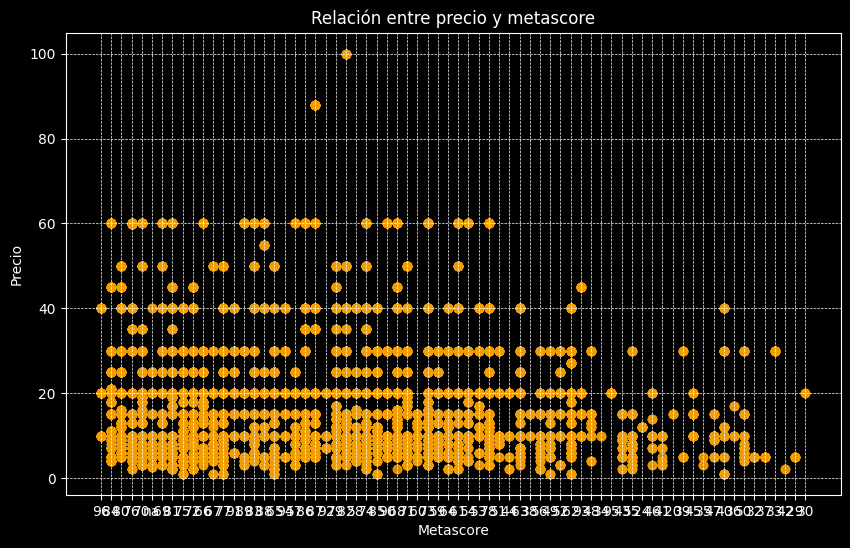

In [64]:
# Filtra los datos para eliminar los valores nulos en las columnas de interés
df_metascore = df.dropna(subset=['precio', 'metascore'])

# Aplicar el estilo dark_background
plt.style.use('dark_background')

# Crear el gráfico de dispersión con colores personalizados
plt.figure(figsize=(10, 6))
plt.scatter(df_metascore['metascore'], df_metascore['precio'], alpha=0.5, c='#F29F05')
plt.xlabel('Metascore', color='white')
plt.ylabel('Precio', color='white')
plt.grid(True, color='white', linestyle='--', linewidth=0.5)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.title('Relación entre precio y metascore', color='white')


# Mostrar el gráfico
plt.show()

In [65]:
# Elimina nulos de la base de datos
df = df.dropna()

In [66]:
df.head(2)

,precio,acceso_anticipado,sentimiento,metascore,año,categoria
1465,9.99,0,muy positivo,96,1998,action
1648,6.99,0,positivo,84,2006,strategy


In [67]:
# Encoding categorpia
encoder = LabelEncoder()
df['categoria_n'] = encoder.fit_transform(df['categoria'])

# Encoding sentimiento
encoder = LabelEncoder()
df['sentimiento_n'] = encoder.fit_transform(df['sentimiento'])

In [68]:
# Crea el dataset de categoría
df_categoria = df[['categoria', 'categoria_n']].drop_duplicates().dropna()
df_categoria.head(2)

,categoria,categoria_n
1465,action,11
1648,strategy,290


In [69]:
# Crea el dataset de sentimiento
df_sentimiento = df[['sentimiento', 'sentimiento_n']].drop_duplicates().dropna()
df_sentimiento.head(2)

,sentimiento,sentimiento_n
1465,muy positivo,1
1648,positivo,4


In [70]:
# Eliminar la columna 'categoria' y 'sentimiento' para el modelo
df_modelo = df.drop(['categoria', 'sentimiento'],axis=1)

df_modelo

,precio,acceso_anticipado,metascore,año,categoria_n,sentimiento_n
1465,9.99,0,96,1998,11,1
1648,6.99,0,84,2006,290,4
1687,6.99,0,80,2006,290,1
1711,9.99,0,76,2006,11,1
1791,9.99,0,76,2006,144,1
...,...,...,...,...,...,...
5257645,14.99,0,93,2004,186,1
5257646,14.99,0,93,2004,285,1
5257698,9.99,0,65,2004,267,1
5257699,9.99,0,65,2004,186,1


In [71]:
df_modelo = df.dropna()

In [72]:
df_modelo = df[df_modelo['metascore'] != 'na']
df_modelo['metascore'].unique()

array(['96', '84', '80', '76', '70', '69', '81', '75', '72', '66', '67',
       '77', '91', '89', '83', '88', '65', '94', '57', '86', '87', '92',
       '79', '82', '58', '74', '85', '90', '68', '71', '60', '73', '59',
       '64', '61', '54', '53', '78', '51', '44', '63', '38', '56', '49',
       '52', '62', '93', '48', '34', '95', '55', '24', '46', '41', '20',
       '39', '45', '35', '47', '43', '40', '36', '50', '32', '37', '33',
       '42', '29', '30'], dtype=object)

In [73]:
df_modelo = df_modelo.drop(['sentimiento','categoria'],axis=1)

In [74]:
df_modelo.head(2)

,precio,acceso_anticipado,metascore,año,categoria_n,sentimiento_n
1465,9.99,0,96,1998,11,1
1648,6.99,0,84,2006,290,4


In [75]:
df_categoria.head()

,categoria,categoria_n
1465,action,11
1648,strategy,290
1791,indie,144
1871,rpg,249
2423,simulation,266


In [76]:
df_sentimiento.head(2)

,sentimiento,sentimiento_n
1465,muy positivo,1
1648,positivo,4


In [77]:
#Convertir año a entero
df_modelo['año'] = df_modelo['año'].astype(int)

#Convertir metascore a entero
df_modelo['metascore'] = df_modelo['metascore'].astype(int)

In [78]:
df_modelo.dtypes

precio               float64
acceso_anticipado      int32
metascore              int32
año                    int32
categoria_n            int32
sentimiento_n          int32
dtype: object

In [79]:
# Guarda los archivos con los dataset
df_modelo.to_parquet('../data/modelo.parquet')
df_categoria.to_parquet('../data/categoria_modelo.parquet')
df_sentimiento.to_parquet('../data/sentimiento_modelo.parquet')